In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

from warnings import simplefilter
simplefilter("ignore")

from sklearn.preprocessing import StandardScaler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card/creditcard.csv


Question:-
Creating a machine learning model

Task: Credit Card Fraud Detection.

Objective: Create a machine learning model to Credit Card Fraud Detection Dataset.. This task will cover data preprocessing, pipeline creation, feature engineering, hyperparameter tuning, and model evaluation.

Steps to Follow

Sure, here are the steps summarized without detailed explanations:

Step 1: Data Collection

Obtain a relevant dataset for credit card fraud detection.
Step 2: Data Preprocessing

Load the dataset.

Perform exploratory data analysis (EDA).

Normalize or standardize the data.

Step 3: Feature Engineering

Select relevant features.

Apply dimensionality reduction techniques if necessary.

Step 4: Model Selection

Choose appropriate machine learning algorithms.
Step 5: Model Training

Split the data into training and testing sets.

Train the selected models.

Tune hyperparameters.

Step 6: Model Evaluation

Evaluate model performance using appropriate metrics.

Implement cross-validation.

Step 7: Model Deployment

Save the trained model.

Deploy the model using a web framework.

Monitor model performance.

Step 8: Documentation and Reporting

Document the entire process.

Create reports and visualizations.

In [2]:
#Loading the Data
# Assuming 'df' is our pandas dataframe containing the credit card fraud dataset
df=pd.read_csv('/kaggle/input/credit-card/creditcard.csv')

In [3]:
#Shows the first 5 coloumns from the data set
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Displays the information present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Dispalys about the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Exploratory Data Analysis(EDA)**

In [6]:
#Finding the null values from the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# If the null values are present in the dataset it will drop the null values from the dataset
df.dropna(inplace=True)

In [8]:
#Removes the duplicate values from the dataset
df.duplicated().sum()

1081

In [9]:
#Prints the all values from the dataset
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
df.shape

(284807, 31)

In [14]:
df.iloc[0]

Time        0.000000
V1         -1.359807
V2         -0.072781
V3          2.536347
V4          1.378155
V5         -0.338321
V6          0.462388
V7          0.239599
V8          0.098698
V9          0.363787
V10         0.090794
V11        -0.551600
V12        -0.617801
V13        -0.991390
V14        -0.311169
V15         1.468177
V16        -0.470401
V17         0.207971
V18         0.025791
V19         0.403993
V20         0.251412
V21        -0.018307
V22         0.277838
V23        -0.110474
V24         0.066928
V25         0.128539
V26        -0.189115
V27         0.133558
V28        -0.021053
Amount    149.620000
Class       0.000000
Name: 0, dtype: float64

**Normalize or standardize the data**

In [15]:
X=df.drop(['Class'],axis=1)
y=df['Class']

**Feature Engineering**

In [16]:
numeric_features=X.select_dtypes(include=['int64','float']).columns
print(numeric_features)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [18]:
import warnings
warnings.filterwarnings('ignore')

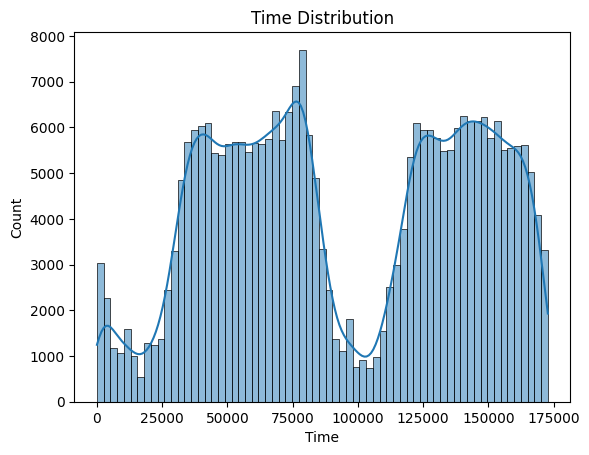

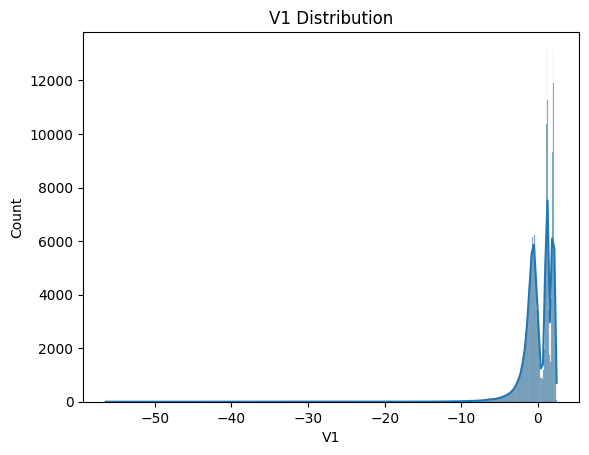

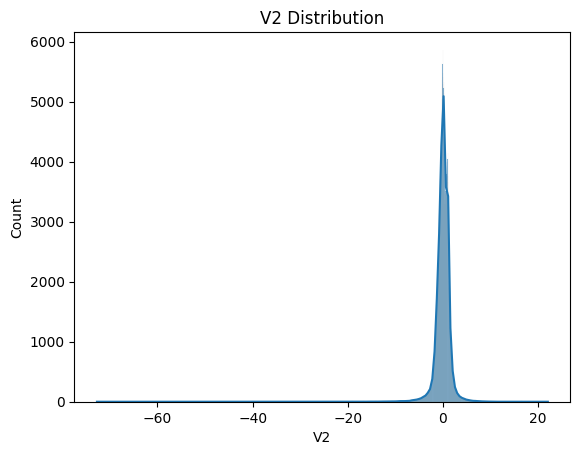

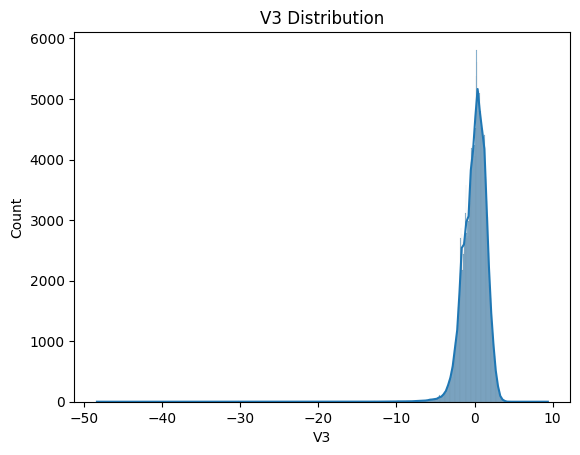

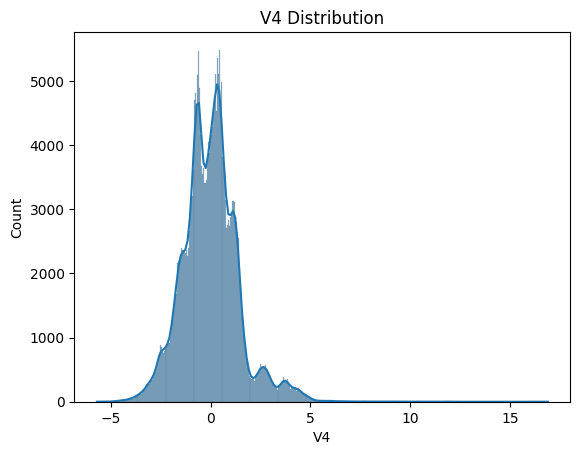

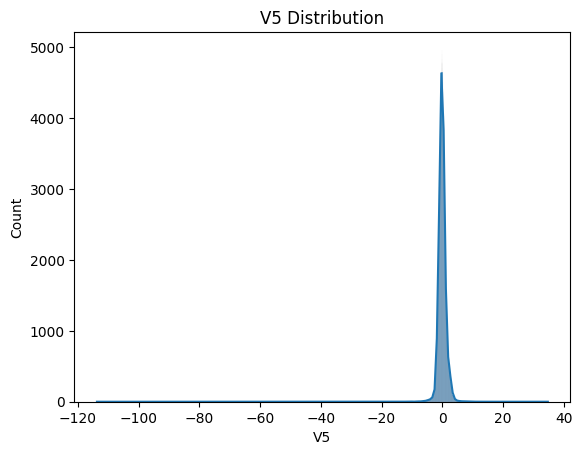

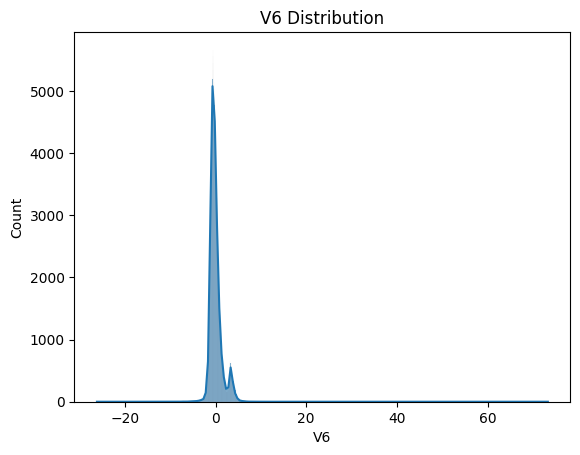

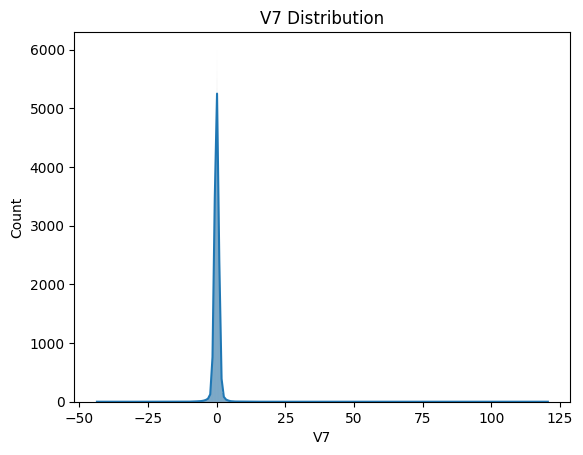

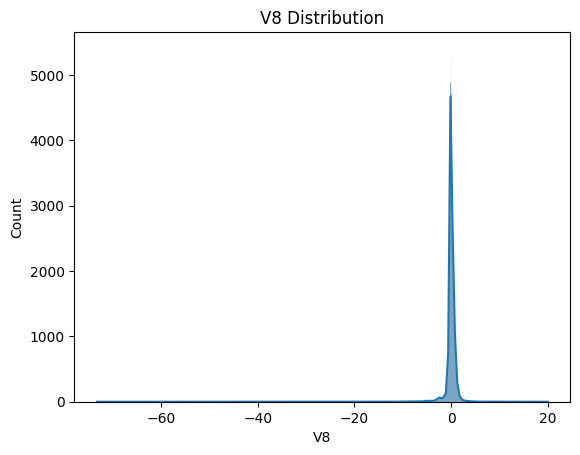

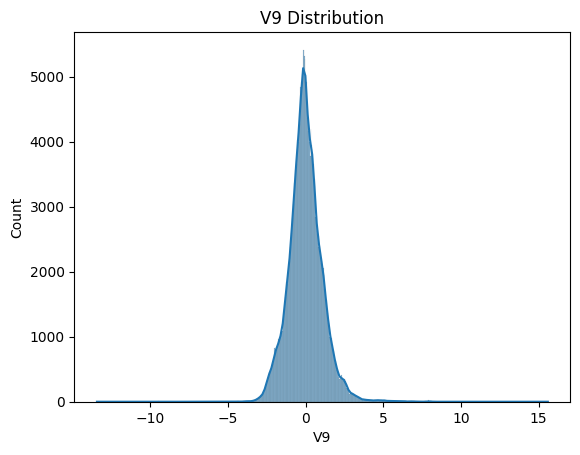

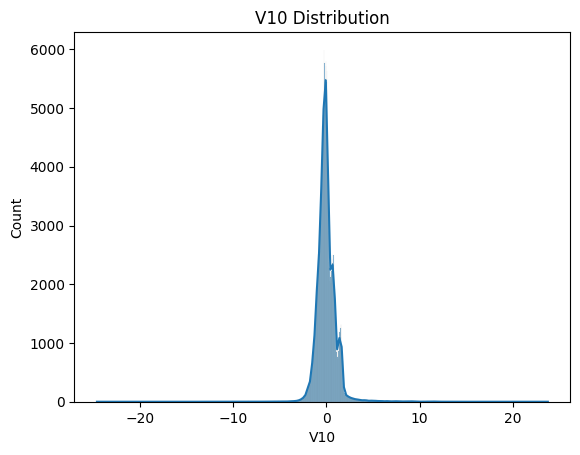

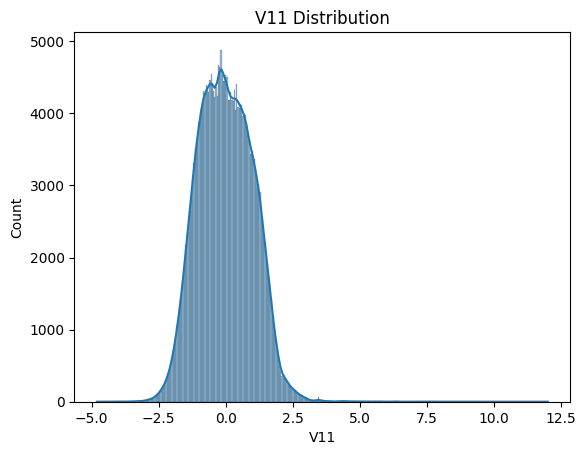

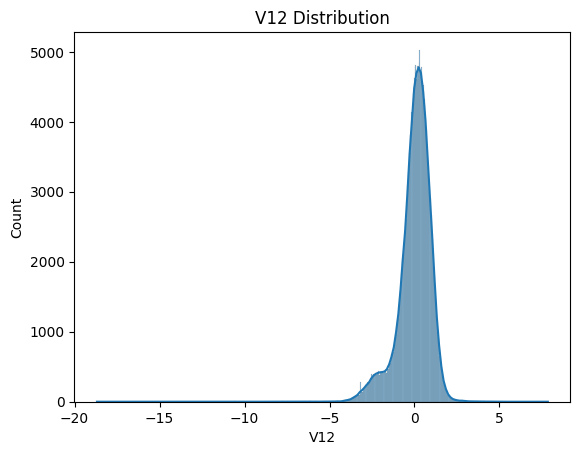

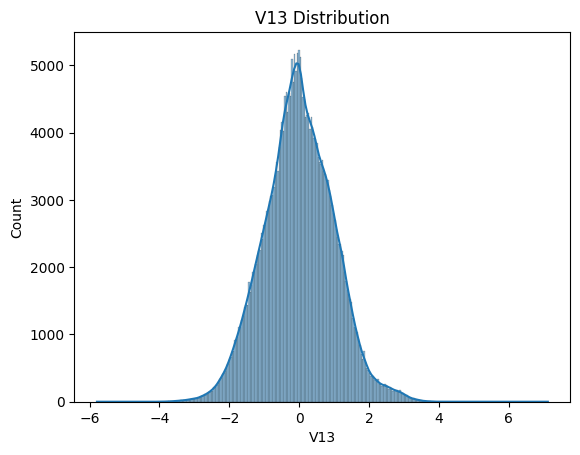

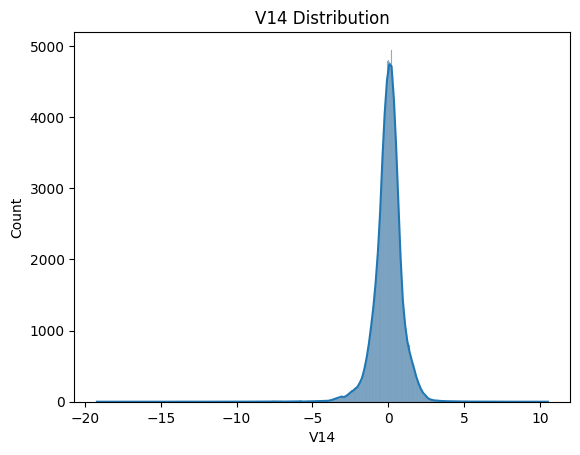

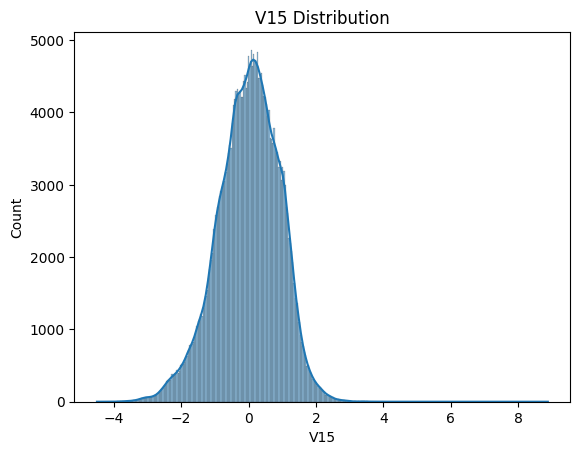

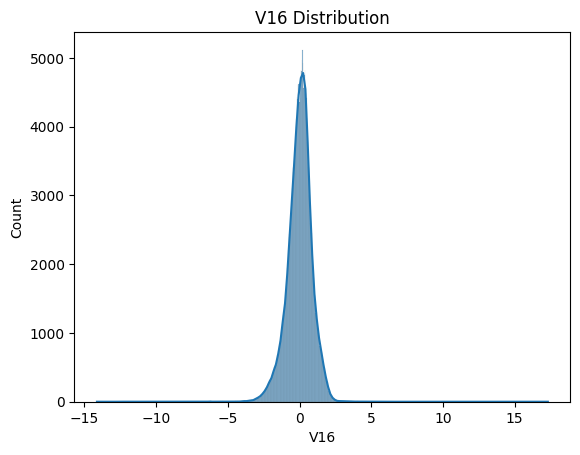

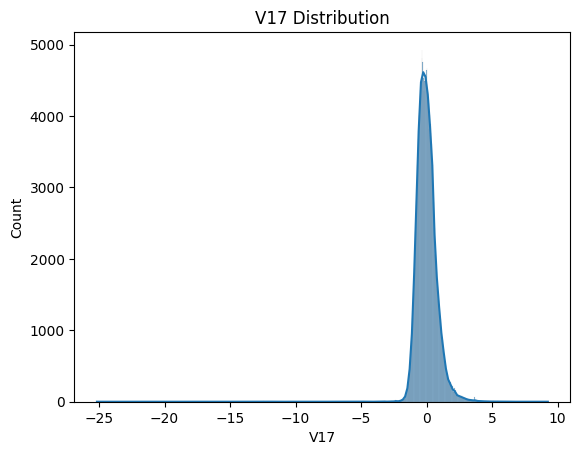

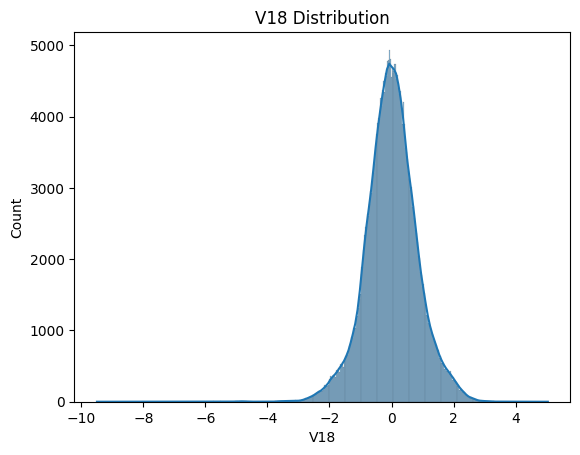

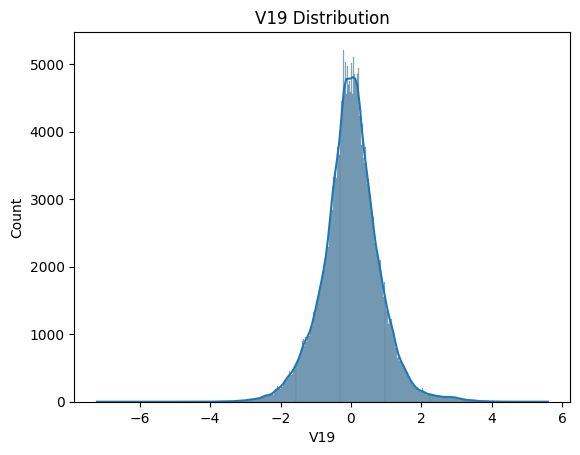

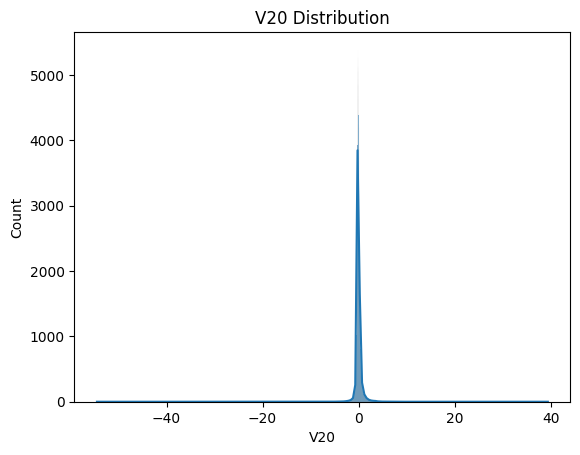

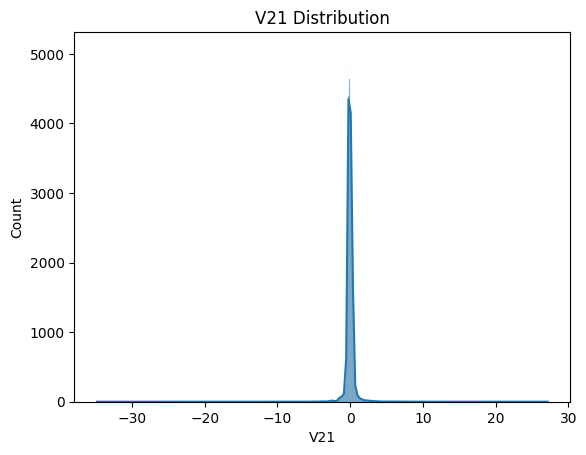

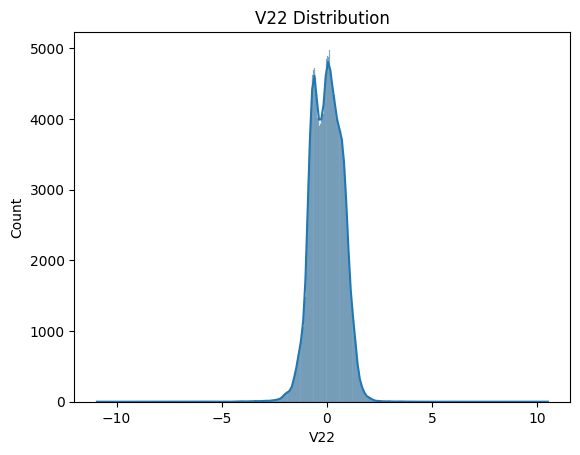

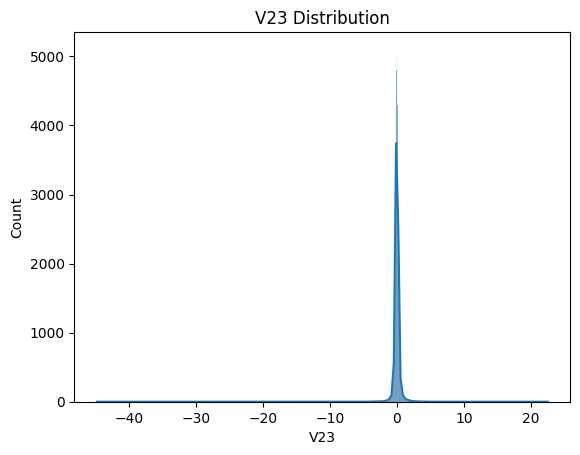

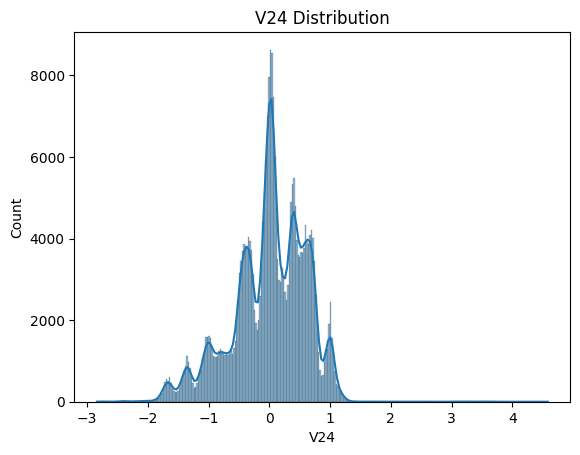

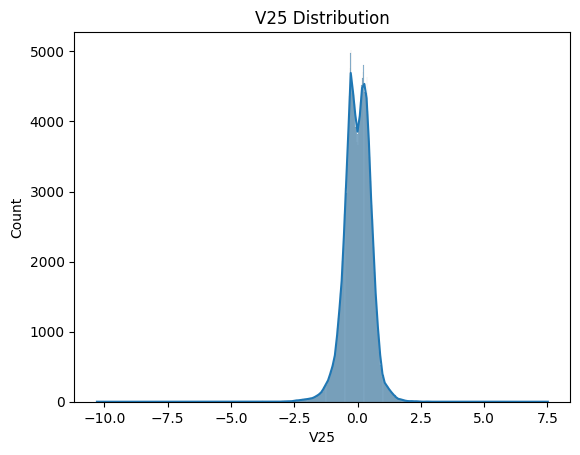

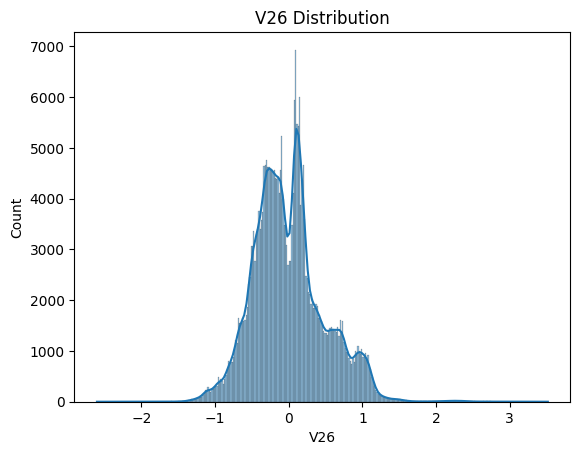

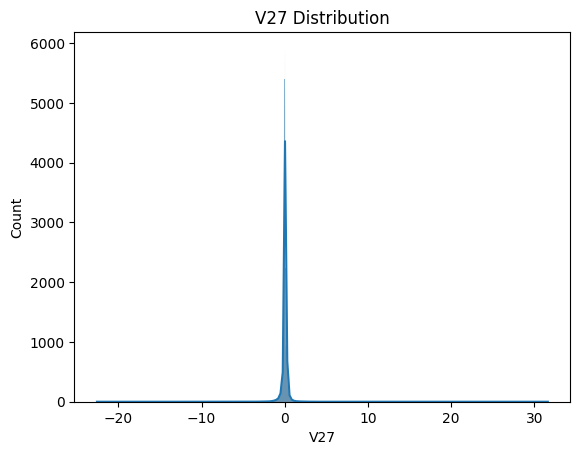

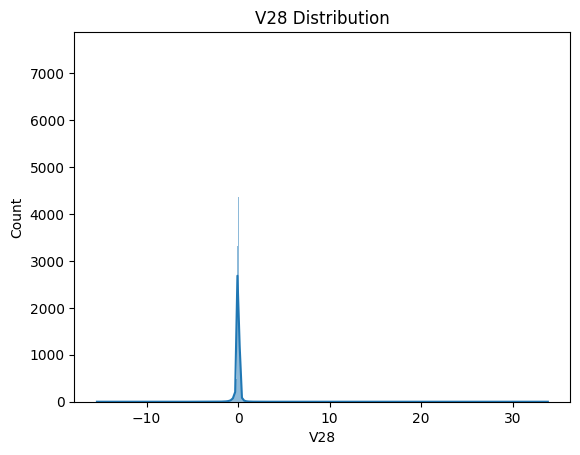

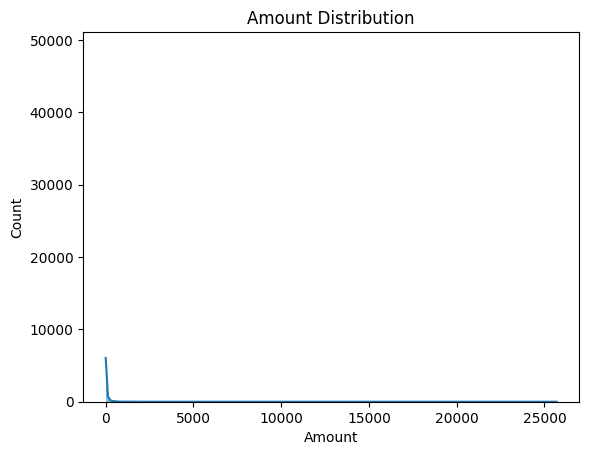

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
for feature in numeric_features:
    sns.histplot(df[feature],kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()

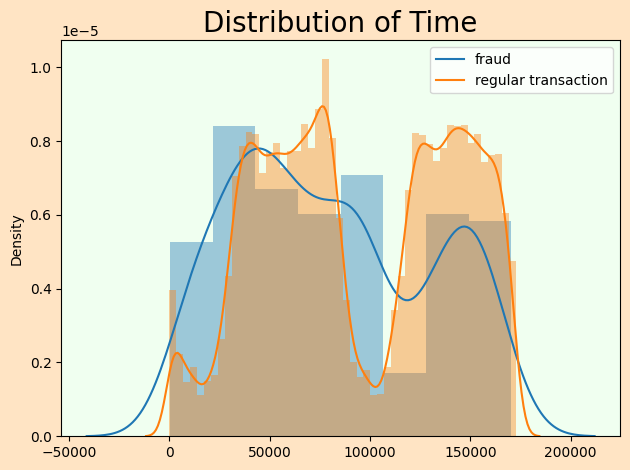

In [20]:
#Time Variable
sns.distplot(df['Time'][df.Class == 1])
sns.distplot(df['Time'][df.Class == 0])
plt.xlabel('')
plt.title('Distribution of Time',fontsize=20)
plt.legend(labels=['fraud','regular transaction'])

plt.gca().set_facecolor('honeydew')
plt.gcf().patch.set_facecolor('bisque')   
plt.tight_layout()
plt.show()

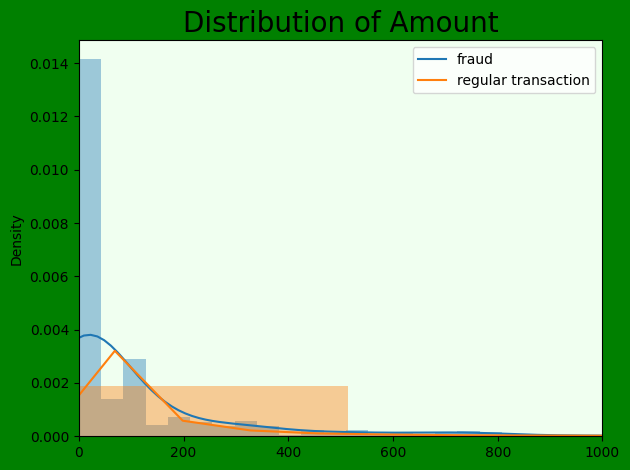

In [21]:
#Distribution of Amount
sns.distplot(df['Amount'][df.Class == 1])
sns.distplot(df['Amount'][df.Class == 0])
plt.xlim(0,1000)
plt.xlabel('')
plt.title('Distribution of Amount',fontsize=20)
plt.legend(labels=['fraud','regular transaction'])

plt.gca().set_facecolor('honeydew')
plt.gcf().patch.set_facecolor('green')   
plt.tight_layout()
plt.show()

**Model Training**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
y=y.values.reshape(-1,1)
y_scaled=scaler.fit_transform(y)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

**Model Evaluation and Model Deployment**

In [28]:
model=LogisticRegressionCV()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy score:', accuracy_score(y_pred,y_test)*100)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

Accuracy score: 99.92275552122467
[[56864    33]
 [   11    54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56897
           1       0.62      0.83      0.71        65

    accuracy                           1.00     56962
   macro avg       0.81      0.92      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
model=AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy score:', accuracy_score(y_pred,y_test)*100)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

Accuracy score: 99.91573329588147
[[56861    34]
 [   14    53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56895
           1       0.61      0.79      0.69        67

    accuracy                           1.00     56962
   macro avg       0.80      0.90      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [30]:
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy score:', accuracy_score(y_pred,y_test)*100)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

Accuracy score: 99.95611109160492
[[56870    20]
 [    5    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56890
           1       0.77      0.93      0.84        72

    accuracy                           1.00     56962
   macro avg       0.89      0.97      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy score:', accuracy_score(y_pred,y_test)*100)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

**Documentaion and Reporting**

#### Introduction

**Objective**:
- The primary objective of this project is to build a machine learning model to detect fraudulent credit card transactions.

**Significance**:
- Credit card fraud detection is a critical task in the financial industry to prevent financial losses and protect consumers. Developing an accurate and efficient model can significantly reduce the incidence of fraud.

#### Data Collection

#### Data Preprocessing

**Loading the Dataset**:
- The dataset is loaded into a pandas DataFrame.

**Exploratory Data Analysis (EDA)**:
- Basic information about the dataset, including the number of records, data types, and summary statistics, is displayed.

- The dataset is checked for missing values.

- The class distribution is visualized to understand the imbalance between fraudulent and non-fraudulent transactions.

**Normalization or Standardization**:
- Features are standardized to have zero mean and unit variance using `StandardScaler`.


#### Feature Engineering

**Feature Selection**:
- All features except the target variable ('Class') are selected.

**Dimensionality Reduction**:
- PCA is applied to reduce the dimensionality of the feature space.

#### Model Selection

**Algorithms Considered**:
- Several machine learning algorithms are considered for the task, including Logistic Regression, Random Forest, and XGBoost. These models are chosen for their performance in classification tasks and their ability to handle imbalanced datasets.

#### Model Training

**Data Splitting**:
- The dataset is split into training and testing sets to evaluate the model's performance on unseen data.
    ```

**Training Models**:
- Each selected model is trained on the training data.


**Hyperparameter Tuning**:
- Randomized search is used to tune hyperparameters for the Random Forest model.


#### Model Evaluation

**Performance Metrics**:
- The models are evaluated using classification reports, confusion matrices, and ROC AUC scores.



**Monitoring Performance**:
- Model performance is monitored by logging predictions and setting up alerts for model drift. This ensures the model remains accurate and reliable over time.



**REPORTING:-
    From the using of different models we can observe that the accuracy is 99.95611109160492. From this we can observed we have selected the right machine learning model according to the objective.**